In [ ]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import pickle 
from timeit import default_timer as timer 
from keras.utils.np_utils import to_categorical # one-hot encoding
from keras.models import Sequential # for stacking layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape # CNN Layer type
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed?select=datasets_preparing.py")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: venkatarohilwardhan
Your Kaggle Key: ··········


100%|██████████| 4.16G/4.16G [00:33<00:00, 132MB/s] 


In [ ]:
obj = pd.read_pickle(r'/content/traffic-signs-preprocessed/train.pickle')
obj

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [ ]:
obj = pd.read_pickle(r'/content/traffic-signs-preprocessed/data2.pickle')
obj

{'y_test': array([25, 11, 38, ...,  8, 33, 10], dtype=uint8),
 'y_validation': array([ 9, 37, 31, ...,  5, 18,  6], dtype=uint8),
 'x_validation': array([[[[-8.13200548e-02, -1.05785601e-01, -1.35571063e-01, ...,
           -1.33438379e-01, -1.00064300e-01, -8.01314786e-02],
          [-1.00652181e-01, -1.28710032e-01, -1.57822788e-01, ...,
           -1.62547588e-01, -1.36362046e-01, -1.08473681e-01],
          [-1.25605583e-01, -1.61946893e-01, -1.91582799e-01, ...,
           -1.84833080e-01, -1.58809453e-01, -1.29200697e-01],
          ...,
          [-8.20988938e-02, -1.09976135e-01, -1.44535631e-01, ...,
           -1.41712368e-01, -6.55412525e-02,  6.91929460e-03],
          [-6.42771199e-02, -8.87806639e-02, -1.19311996e-01, ...,
           -1.14659391e-01, -1.05807483e-02,  7.35892355e-02],
          [-4.32938561e-02, -6.82745054e-02, -8.79732892e-02, ...,
           -7.85297081e-02,  5.03404289e-02,  1.38326406e-01]],
 
         [[-8.57955888e-02, -1.09240018e-01, -1.37785345

In [ ]:
with open('/content/traffic-signs-preprocessed/data2.pickle','rb') as f:
    data=pickle.load(f,encoding='latin1')

data['y_train']=to_categorical(data['y_train'],num_classes=43)
data['y_validation']=to_categorical(data['y_validation'],num_classes=43)

data['x_train']=data['x_train'].transpose(0,2,3,1)
data['x_validation']=data['x_validation'].transpose(0,2,3,1)
data['x_test']=data['x_test'].transpose(0,2,3,1)

for i,j in data.items():
    if(i=='labels'):
        print(i+':',len(j))
    else:
        print(i+':',j.shape)

y_test: (12630,)
y_validation: (4410, 43)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_train: (86989, 43)
labels: 43
x_test: (12630, 32, 32, 3)


(81, 32, 32, 3)


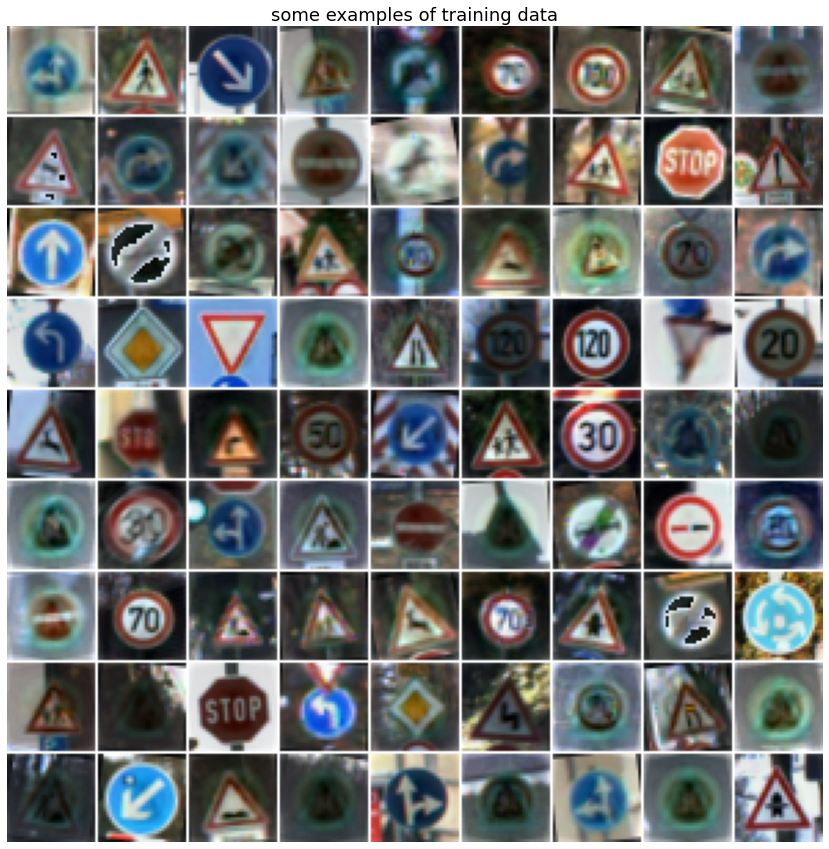

In [ ]:
%matplotlib inline

def convert_to_grid(x_input):
    N,H,W,C=x_input.shape
    grid_size=int(np.ceil(np.sqrt(N)))
    grid_height=H * grid_size + 1*(grid_size-1)
    grid_width=W * grid_size + 1*(grid_size-1)
    grid=np.zeros((grid_height,grid_width,C))+255
    next_idx=0
    y0,y1=0,H
    for y in range(grid_size):
        x0,x1=0,W
        for x in range(grid_size):
            if(next_idx<N):
                img=x_input[next_idx]
                low,high=np.min(img),np.max(img)
                grid[y0:y1,x0:x1]=255.0*(img-low)/(high-low)
                next_idx+=1
            x0+=W+1
            x1+=W+1
        y0+=H+1
        y1+=H+1
    return grid

examples=data['x_train'][:81,:,:,:]
print(examples.shape)

fig=plt.figure()
grid=convert_to_grid(examples)
plt.imshow(grid.astype("uint8"),cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(15,15)
plt.title('some examples of training data',fontsize=18)

plt.show()

fig.savefig('training_examples.png')
plt.close()

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(43,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 500)               4096500   
                                                                 
 dense_1 (Dense)             (None, 43)                21543     
                                                                 
Total params: 4,118,939
Trainable params: 4,118,939
Non-trainable params: 0
______________________________________________

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
annealer=LearningRateScheduler(lambda x:1e-3*0.95**(x+epochs))
epochs=15
h=model.fit(data['x_train'][:10],data['y_train'][:10],
           batch_size=5,epochs=epochs,
           validation_data=(data['x_validation'],data['y_validation']),
           callbacks=[annealer],verbose=1)

Epoch 1/15
2/2 [==============================] - 12s 2s/step - loss: 3.7739 - accuracy: 0.1000 - val_loss: 3.8036 - val_accuracy: 0.0385 - lr: 4.6329e-04
Epoch 2/15
2/2 [==============================] - 3s 3s/step - loss: 2.9763 - accuracy: 0.4000 - val_loss: 3.9108 - val_accuracy: 0.0426 - lr: 4.4013e-04
Epoch 3/15
2/2 [==============================] - 3s 3s/step - loss: 2.4065 - accuracy: 0.4000 - val_loss: 4.2294 - val_accuracy: 0.0404 - lr: 4.1812e-04
Epoch 4/15
2/2 [==============================] - 2s 2s/step - loss: 1.9410 - accuracy: 0.5000 - val_loss: 4.7217 - val_accuracy: 0.0420 - lr: 3.9721e-04
Epoch 5/15
2/2 [==============================] - 3s 3s/step - loss: 1.6017 - accuracy: 0.5000 - val_loss: 5.2535 - val_accuracy: 0.0442 - lr: 3.7735e-04
Epoch 6/15
2/2 [==============================] - 2s 2s/step - loss: 1.3493 - accuracy: 0.6000 - val_loss: 5.7724 - val_accuracy: 0.0458 - lr: 3.5849e-04
Epoch 7/15
2/2 [==============================] - 3s 3s/step - loss: 1.1300

In [ ]:
print(('Epochs={0:d}, training accuracy={1:.5f}, validation accuracy={2:.5f}').\
      format(epochs, max(h.history['accuracy']), max(h.history['val_accuracy'])))

Epochs=15, training accuracy=1.00000, validation accuracy=0.05079


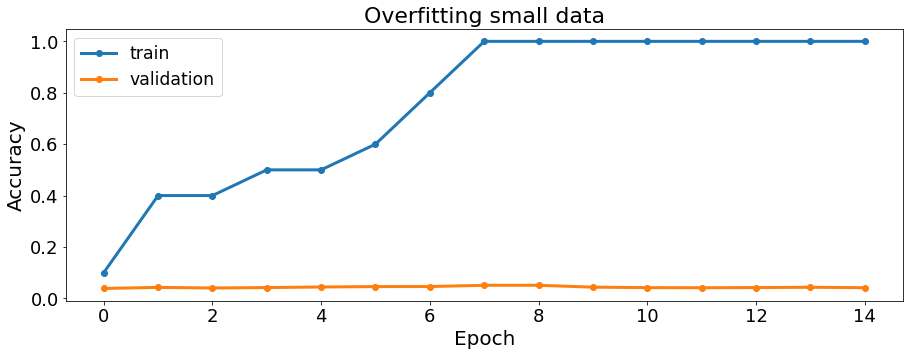

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize']=(15.0,5.0)
plt.rcParams['image.interpolation']='nearest'

fig=plt.figure()
plt.plot(h.history['accuracy'],'-o',linewidth=3.0)
plt.plot(h.history['val_accuracy'],'-o',linewidth=3.0)
plt.title('Overfitting small data',fontsize=22)
plt.legend(['train','validation'],loc='upper left',fontsize='xx-large')
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.tick_params(labelsize=18)

plt.show()

fig.savefig('overfitting_small_data.png')
plt.close()

In [ ]:
filters = [3, 5, 9, 13, 15]
model = [0] * len(filters)

for i in range(len(model)):
    model[i] = Sequential()
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='same', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(MaxPool2D(pool_size=2))
    model[i].add(Flatten())
    model[i].add(Dense(500, activation='relu'))
    model[i].add(Dense(43, activation='softmax'))
    model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 5

h = [0] * len(model)

for i in range(len(h)):
    h[i] = model[i].fit(data['x_train'], data['y_train'],
                        batch_size=5, epochs = epochs,
                        validation_data = (data['x_validation'], data['y_validation']),
                        callbacks=[annealer], verbose=0)
    
    print('Model with filters {0:d}x{0:d}, epochs={1:d}, training accuracy={2:.5f}, validation accuracy={3:.5f}'.\
      format(filters[i], epochs, max(h[i].history['accuracy']), max(h[i].history['val_accuracy'])))

Model with filters 3x3, epochs=5, training accuracy=0.98858, validation accuracy=0.88503
Model with filters 5x5, epochs=5, training accuracy=0.98700, validation accuracy=0.86848
Model with filters 9x9, epochs=5, training accuracy=0.98134, validation accuracy=0.84671
Model with filters 13x13, epochs=5, training accuracy=0.97501, validation accuracy=0.82313
Model with filters 15x15, epochs=5, training accuracy=0.96851, validation accuracy=0.83537


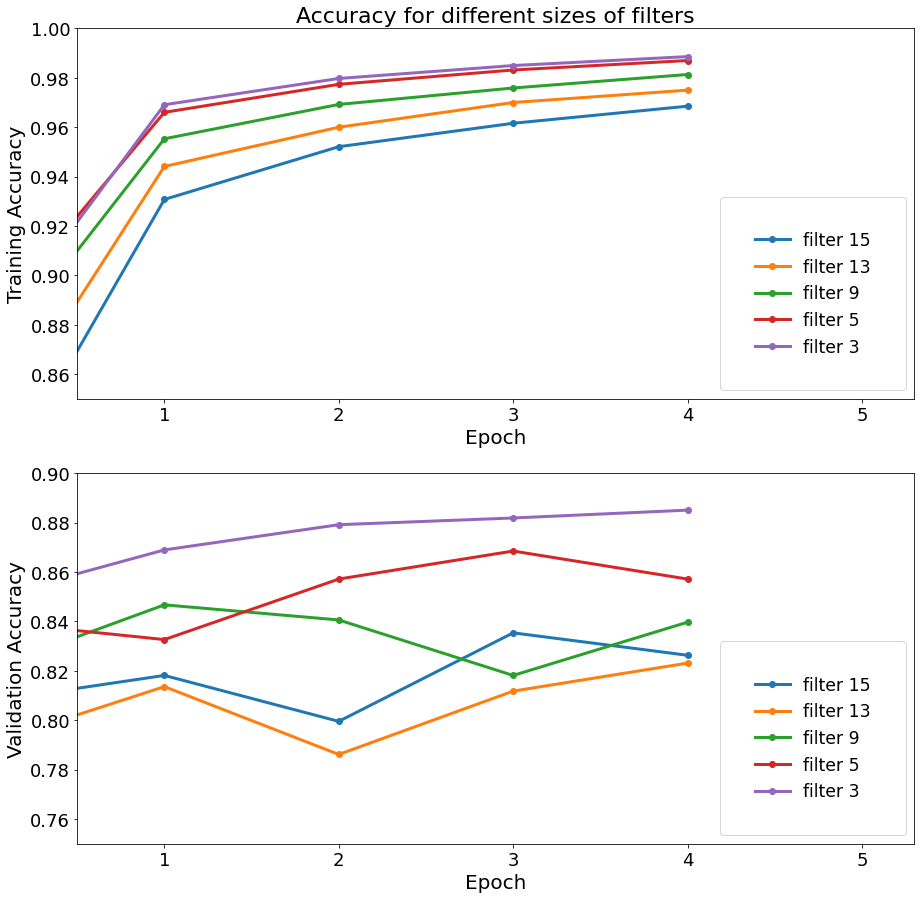

data2 filter 3 training accuracy = 0.98858
data2 filter 5 training accuracy = 0.98700
data2 filter 9 training accuracy = 0.98134
data2 filter 13 training accuracy = 0.97501
data2 filter 15 training accuracy = 0.96851

data2 filter 3 validation accuracy = 0.88503
data2 filter 5 validation accuracy = 0.86848
data2 filter 9 validation accuracy = 0.84671
data2 filter 13 validation accuracy = 0.82313
data2 filter 15 validation accuracy = 0.83537


In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(h[4].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[3].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[2].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[1].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[0].history['accuracy'], '-o', linewidth=3.0)
plt.legend(['filter 15', 'filter 13', 'filter 9', 'filter 5', 'filter 3'], loc='lower right', fontsize='xx-large', borderpad=2)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Training Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear') 
plt.ylim(0.85, 1.0)
plt.xlim(0.5, 5.3) 
plt.title('Accuracy for different sizes of filters', fontsize=22)
plt.tick_params(labelsize=18)

plt.subplot(2, 1, 2)
plt.plot(h[4].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[3].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[2].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[1].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[0].history['val_accuracy'], '-o', linewidth=3.0)
plt.legend(['filter 15', 'filter 13', 'filter 9', 'filter 5', 'filter 3'], loc='lower right', fontsize='xx-large', borderpad=2)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Validation Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear')  
plt.ylim(0.75, 0.9)
plt.xlim(0.5, 5.3)
plt.tick_params(labelsize=18)

plt.show()

fig.savefig('models_accuracy.png')
plt.close()


for i in range(len(h)):
    print('data2 filter {0:d} training accuracy = {1:.5f}'.\
          format(filters[i], np.max(h[i].history['accuracy'])))

print()

for i in range(len(h)):
    print('data2 filter {0:d} validation accuracy = {1:.5f}'.\
          format(filters[i], np.max(h[i].history['val_accuracy'])))

In [ ]:
for i in range(len(model)):
    temp = model[i].predict(data['x_test'])
    temp = np.argmax(temp, axis=1)

    temp = np.mean(temp == data['y_test'])
    
    print('data2 filter {0:d} testing accuracy = {1:.5f}'.format(filters[i], temp))

395/395 [==============================] - 1s 2ms/step
data2 filter 3 testing accuracy = 0.87846
395/395 [==============================] - 1s 2ms/step
data2 filter 5 testing accuracy = 0.86738
395/395 [==============================] - 1s 2ms/step
data2 filter 9 testing accuracy = 0.86247
395/395 [==============================] - 1s 2ms/step
data2 filter 13 testing accuracy = 0.85083
395/395 [==============================] - 1s 2ms/step
data2 filter 15 testing accuracy = 0.84893


In [ ]:
for i in range(len(model)):
    start = timer()
    temp = model[i].predict(data['x_test'][:1, :, :, :])
    end = timer()
    
    print('data2 filter {0:d} classification time = {1:.5f}'.format(filters[i], end - start))

1/1 [==============================] - 0s 46ms/step
data2 filter 3 classification time = 0.08571
1/1 [==============================] - 0s 33ms/step
data2 filter 5 classification time = 0.06688
1/1 [==============================] - 0s 28ms/step
data2 filter 9 classification time = 0.06070
1/1 [==============================] - 0s 32ms/step
data2 filter 13 classification time = 0.05985
1/1 [==============================] - 0s 31ms/step
data2 filter 15 classification time = 0.08368


(3, 3, 3, 32)
(32, 3, 3, 3)


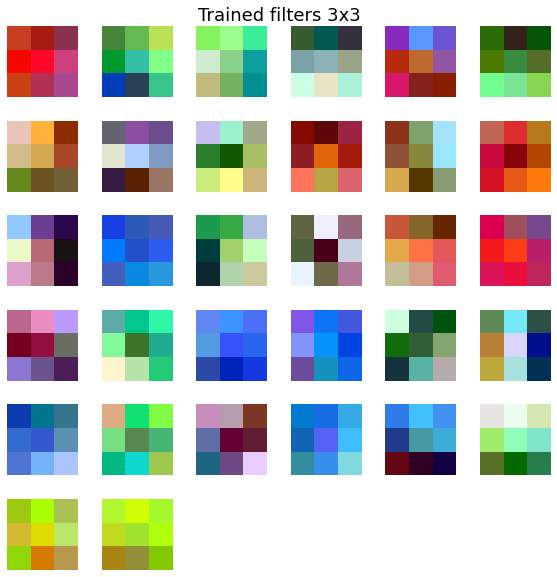

(5, 5, 3, 32)
(32, 5, 5, 3)


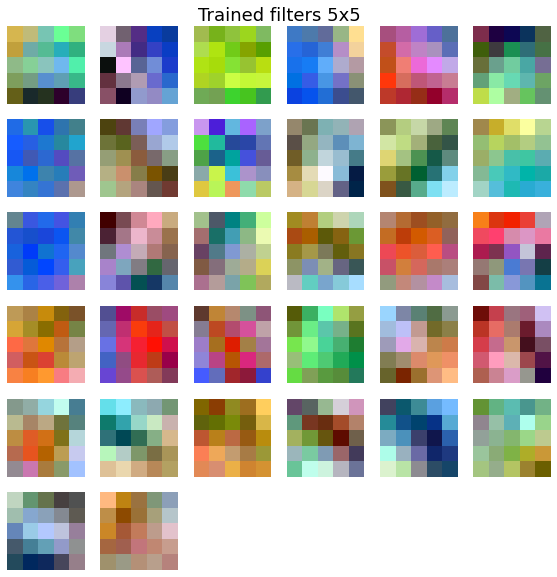

(9, 9, 3, 32)
(32, 9, 9, 3)


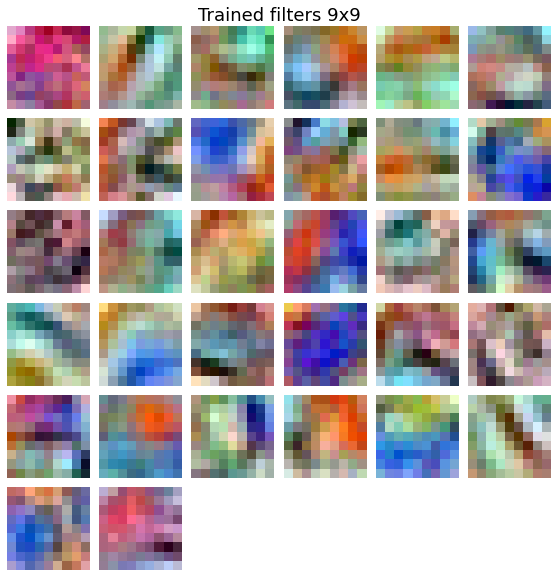

(13, 13, 3, 32)
(32, 13, 13, 3)


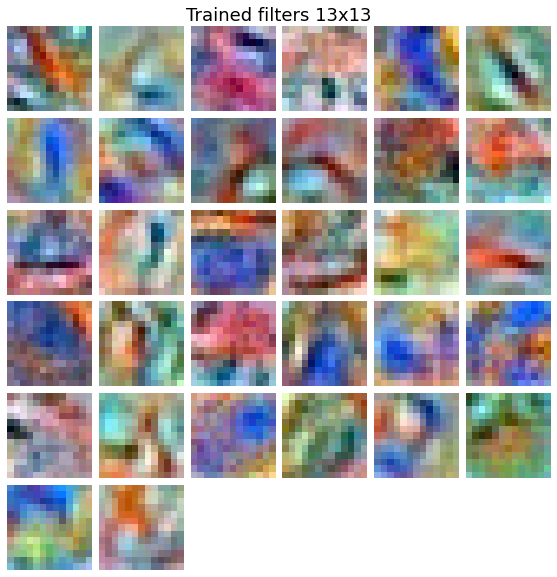

(15, 15, 3, 32)
(32, 15, 15, 3)


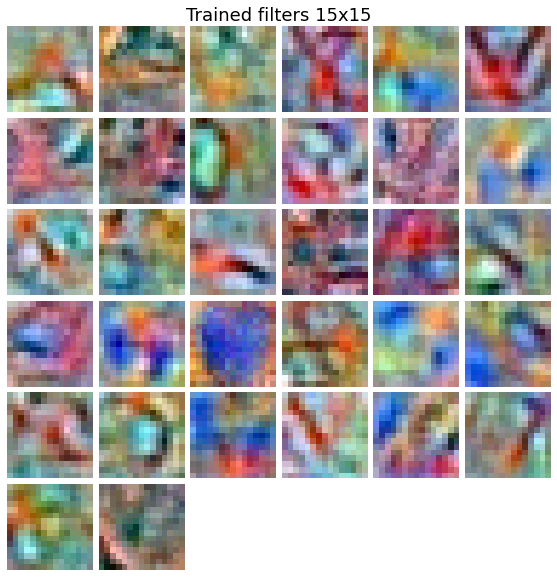

In [ ]:
for i in range(len(model)):
    w = model[i].get_weights()
    print(w[0].shape)

    temp = w[0].transpose(3, 0, 1, 2)
    print(temp.shape)  # (81, 32, 32, 3)

    fig = plt.figure()
    grid = convert_to_grid(temp)
    plt.imshow(grid.astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.gcf().set_size_inches(10, 10)
    name = 'Trained filters ' + str(filters[i]) + 'x' + str(filters[i])
    plt.title(name, fontsize=18)
    
    plt.show()

    name = 'filters-' + str(filters[i]) + 'x' + str(filters[i]) + '.png'
    fig.savefig(name)
    plt.close()

In [ ]:
filters = [3, 5, 9, 13, 15]
model = [0] * len(filters)

for i in range(len(model)):
    model[i] = Sequential()
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='same', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='same', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(MaxPool2D(pool_size=2))
    model[i].add(Dropout(rate=0.5))
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='same', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='valid', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(MaxPool2D(pool_size=2))
    model[i].add(Dropout(rate=0.5))
    model[i].add(Flatten())
    model[i].add(Dense(500, activation='relu'))
    model[i].add(Dropout(rate=0.5))
    model[i].add(Dense(500, activation='relu'))
    model[i].add(Dropout(rate=0.5))
    model[i].add(Dense(43, activation='softmax'))
    model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model[0].summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        9248      
                                                      

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 5

h = [0] * len(model)

for i in range(len(h)):
    h[i] = model[i].fit(data['x_train'], data['y_train'],
                        batch_size=5, epochs = epochs,
                        validation_data = (data['x_validation'], data['y_validation']),
                        callbacks=[annealer], verbose=0)
    
    print('Model with filters {0:d}x{0:d}, epochs={1:d}, training accuracy={2:.5f}, validation accuracy={3:.5f}'.\
      format(filters[i], epochs, max(h[i].history['accuracy']), max(h[i].history['val_accuracy'])))

NameError: ignored

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(h[4].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[3].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[2].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[1].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[0].history['accuracy'], '-o', linewidth=3.0)
plt.legend(['filter 15', 'filter 13', 'filter 9', 'filter 5', 'filter 3'], loc='lower right', fontsize='xx-large', borderpad=2)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Training Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear') 
plt.ylim(0.85, 1.0)
plt.xlim(0.5, 5.3) 
plt.title('Accuracy for different sizes of filters', fontsize=22)
plt.tick_params(labelsize=18)

plt.subplot(2, 1, 2)
plt.plot(h[4].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[3].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[2].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[1].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[0].history['val_accuracy'], '-o', linewidth=3.0)
plt.legend(['filter 15', 'filter 13', 'filter 9', 'filter 5', 'filter 3'], loc='lower right', fontsize='xx-large', borderpad=2)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Validation Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear')  
plt.ylim(0.75, 0.9)
plt.xlim(0.5, 5.3)
plt.tick_params(labelsize=18)

plt.show()

fig.savefig('models_accuracy.png')
plt.close()


for i in range(len(h)):
    print('data2 filter {0:d} training accuracy = {1:.5f}'.\
          format(filters[i], np.max(h[i].history['accuracy'])))

print()

for i in range(len(h)):
    print('data2 filter {0:d} validation accuracy = {1:.5f}'.\
          format(filters[i], np.max(h[i].history['val_accuracy'])))

In [ ]:
for i in range(len(model)):
    temp = model[i].predict(data['x_test'])
    temp = np.argmax(temp, axis=1)

    temp = np.mean(temp == data['y_test'])
    
    print('data2 filter {0:d} testing accuracy = {1:.5f}'.format(filters[i], temp))

In [ ]:
for i in range(len(model)):
    start = timer()
    temp = model[i].predict(data['x_test'][:1, :, :, :])
    end = timer()
    
    print('data2 filter {0:d} classification time = {1:.5f}'.format(filters[i], end - start))

In [ ]:
for i in range(len(model)):
    w = model[i].get_weights()
    print(w[0].shape)

    temp = w[0].transpose(3, 0, 1, 2)
    print(temp.shape)  # (81, 32, 32, 3)

    fig = plt.figure()
    grid = convert_to_grid(temp)
    plt.imshow(grid.astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.gcf().set_size_inches(10, 10)
    name = 'Trained filters ' + str(filters[i]) + 'x' + str(filters[i])
    plt.title(name, fontsize=18)
    
    plt.show()

    name = 'filters-' + str(filters[i]) + 'x' + str(filters[i]) + '.png'
    fig.savefig(name)
    plt.close()

In [ ]:
%matplotlib inline

# Preparing image for predicting from test dataset
x_input = data['x_test'][100:101]
print(x_input.shape)
y_input = data['y_test'][100:101]
print(y_input)

plt.rcParams['figure.figsize'] = (2.5, 2.5) # Setting default size of plots
plt.imshow(x_input[0, :, :, :])
plt.axis('off')

# Showing the plot
plt.show()

# Getting scores from forward pass of input image
scores = model[0].predict(x_input)
print(scores[0].shape) # (43,)

# Scores is given for image with 43 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)
print('ClassId:', prediction)

# Defining function for getting texts for every class - labels
def label_text(file):
    # Defining list for saving label in order from 0 to 42
    label_list = []
    
    # Reading 'csv' file and getting image's labels
    r = pd.read_csv(file)
    # Going through all names
    for name in r['SignName']:
        # Adding from every row second column with name of the label
        label_list.append(name)
    
    # Returning resulted list with labels
    return label_list


# Getting labels
labels = label_text('/content/drive/MyDrive/archive (3)/label_names.csv')

# Printing label for classified Traffic Sign
print('Label:', labels[prediction])